# Data distributions

In [7]:
from data import dataset
import numpy as np
from scipy.sparse import coo_matrix, csc_matrix, csr_matrix
import matplotlib.pyplot as plt

um = dataset.load_sparse_matrix(file="../data/raw_ratings_train.npz")

print("shape", um.shape)
print("max=", np.max(um))
print("average=", np.mean(um))
print("min=", np.min(um))

shape (610, 9724)
max= 5.0
average= 0.04774000107895964
min= 0.0


## Rating distriubution (over clicks)

(array([ 1077.,  2196.,  1405.,  5898.,  4456., 15982., 10517., 21620.,
         6854., 10664.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

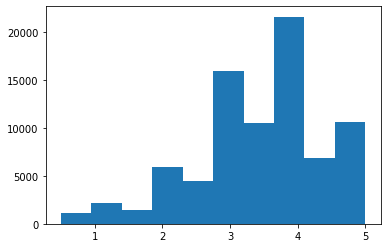

In [8]:
plt.hist(x=um.data, bins=10)

## Percentage rated (over clicks)

In [9]:
np.sum(um != 0)/(um.shape[0]*um.shape[1])

0.013599780161978811

## How many movies are rated per user?

min= 13
max= 2162
average= 132.24426229508197


(array([521.,  53.,  16.,  11.,   5.,   0.,   1.,   1.,   0.,   2.]),
 array([  13. ,  227.9,  442.8,  657.7,  872.6, 1087.5, 1302.4, 1517.3,
        1732.2, 1947.1, 2162. ]),
 <a list of 10 Patch objects>)

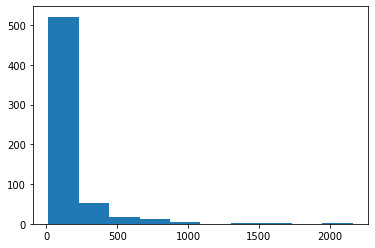

In [19]:
num_ratings_per_user = np.sum(um.tocsr() != 0, axis=1)
num_ratings_per_user = np.squeeze(np.asarray(num_ratings_per_user))

print("min=", np.min(num_ratings_per_user))
print("max=", np.max(num_ratings_per_user))
print("average=", np.mean(num_ratings_per_user))
plt.hist(x=num_ratings_per_user, bins=10)

## How many ratings each movie received?

min= 0
max= 329
average= 8.295865898807076


(array([9.073e+03, 4.260e+02, 1.100e+02, 6.000e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([  0. ,  32.9,  65.8,  98.7, 131.6, 164.5, 197.4, 230.3, 263.2,
        296.1, 329. ]),
 <a list of 10 Patch objects>)

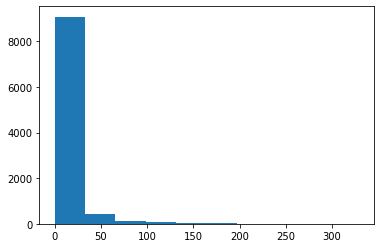

In [20]:
um_csc = um.tocsc()
num_ratings_per_movie = np.sum(um_csc != 0, axis=0)
num_ratings_per_movie = np.squeeze(np.asarray(num_ratings_per_movie))

print("min=", np.min(num_ratings_per_movie))
print("max=", np.max(num_ratings_per_movie))
print("average=", np.mean(num_ratings_per_movie))
plt.hist(x=num_ratings_per_movie, bins=10)

## Proportion of movies that are not at all rated

In [21]:
print("p=", np.sum(num_ratings_per_movie == 0)/num_ratings_per_movie.shape[0])

p= 0.19631838749485808
